In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img=cv2.imread('./test_images/test1.jfif')
img.shape

(183, 275, 3)

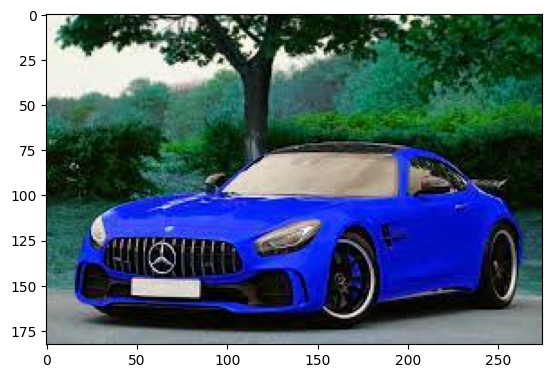

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(183, 275)

In [5]:
gray

array([[238, 238, 238, ...,  61,  43,  65],
       [238, 238, 238, ...,  58,  43,  61],
       [238, 238, 238, ...,  30,  21,  33],
       ...,
       [147, 147, 149, ..., 146, 146, 146],
       [143, 145, 148, ..., 145, 145, 145],
       [140, 143, 147, ..., 144, 144, 144]], dtype=uint8)

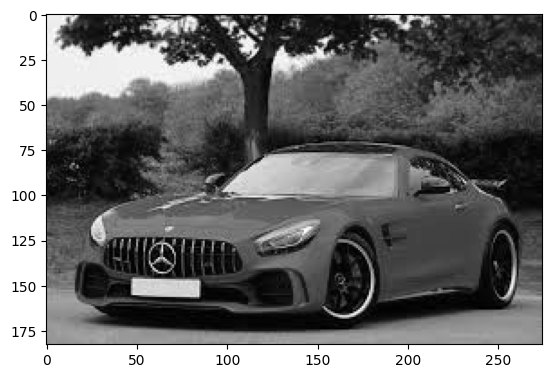

In [6]:
plt.imshow(gray, cmap='gray')

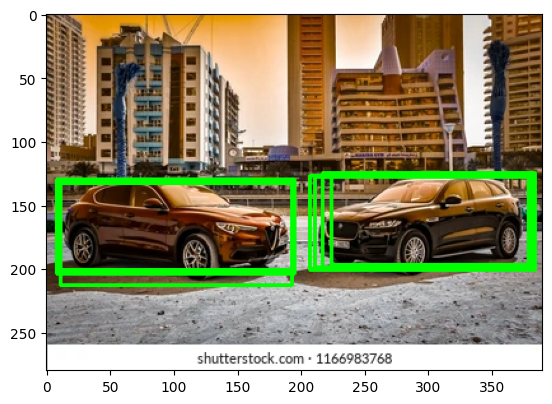

In [64]:
net = cv2.dnn.readNet("openCV/yolov3.weights", "openCV/yolov3.cfg")
classes = ['car']

image = cv2.imread("./test_images/test12.jfif")

height, width, _ = image.shape
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(net.getUnconnectedOutLayersNames())


for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.9 :
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            car_crop = image[y:y + h, x:x + w]

plt.imshow(image)

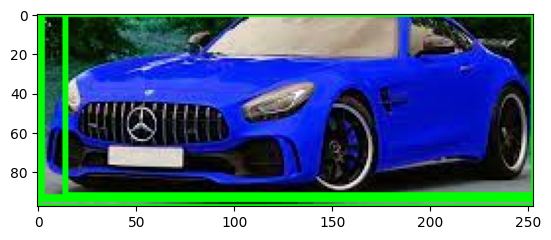

In [8]:
plt.imshow( car_crop)

In [49]:
def get_cropped_car_image(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    height, width, _ = img.shape
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(net.getUnconnectedOutLayersNames())
    max_area=1000 #min 1000 pixles in area
    flag=1
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.7 :
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                area=w*h;
                if area>max_area:
                    max_area=area
                    car_crop = img[y:y + h, x:x + w]
                    flag=0

    if flag==1:
        error=cv2.imread("./test_images/error.jfif")
        car_crop=error
        
    return car_crop

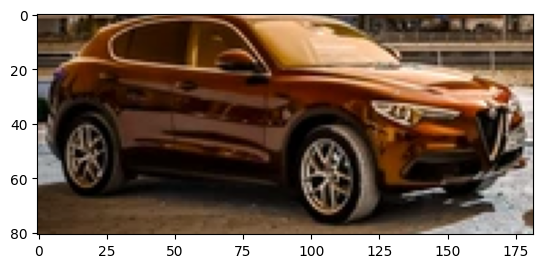

In [62]:
cropped_img=get_cropped_car_image('./test_images/test12.jfif')
plt.imshow(cropped_img)